## Acceptance sampling plans

Suppose that a single-sampling plan with n = 150 and c = 2 is being used for receiving inspection where the supplier ships the product in lots of size N = 3000.

a) Draw the OC curve for this plan.

b) Draw the AOQ curve and find the AOQL.

c) Draw the ATI curve for this plan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### OC Curve

In [3]:
from math import factorial
# Function to calculate Combination
def comb(n, r):
    return factorial(n) / (factorial(r) * factorial(n-r))

In [4]:
# Function to Calculate Probabiliy of Acceptance Using Hypergeometric function for finite lot size
def hypergeometric(c, n, N, data):
    prob = []
    for i in data.index:
        h = []
        p = data[i]
        for j in range(c+1):
            M = int(N*p) 
            if M == 0:
                value = (comb((N-M), (n-j)) ) // comb(N, n)
                h.append(value)
            elif N-M >= n-j and M >= j:
                value = (comb(M, j) * comb((N-M), (n-j)) ) / comb(N, n)
                h.append(value)
            else:
                h.append(0)
        prob.append(np.round(np.sum(h), 5))
    return prob

In [6]:
# Function to Calculate Probabiliy of Acceptance for infinite lot size
def infinite_size(c, n, data):
    prob = []
    for i in data.index:
        p = data[i]
        h = []
        for x in range(c+1):
            value = comb(n, x) * (p**x) * (1-p)**(n-x)
            h.append(value)
        prob.append(np.round(np.sum(h), 5))
    return prob

In [7]:
def specific_d(d, n , data):
    prob = []
    for i in data.index:
        p = data[i]
        prob.append(np.round(comb(n, d) * (p**d) * (1-p)**(n-d), 5))
    return prob

In [8]:
# Function to Plot the OC curves
def show(X, Y, color, axis=[0, 1, 0, 1]):
    plt.figure(figsize=(6, 5))
    plt.plot(X, Y, color=color)
    plt.xlabel('Lot Proportion Defective')
    plt.ylabel('Probability of acceptance')
    plt.axis(axis)
    plt.grid()
    plt.show()

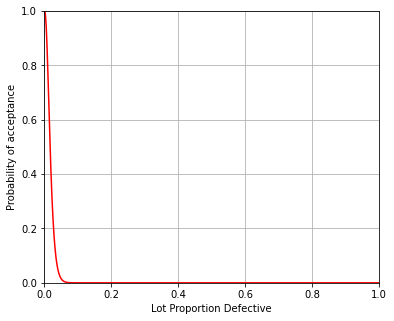

In [12]:
# Lot size is finite 
N = 3000 # Lot size
n = 150 # sample size
c = 2

# Create dataframe to store values
df1 = pd.DataFrame()
df1["p"] = np.arange(0, 1.0, 0.001)
df1['Prob_of_acceptance'] = hypergeometric(c, n, N, df1["p"])
show(df1['p'], df1['Prob_of_acceptance'], 'red')


#####  AOQ Curve

In [14]:
df1['AOQ'] = [(df1.iloc[i,0] * df1.iloc[i,1] * (N-n))/N for i in df1.index]
df1

,p,Prob_of_acceptance,AOQ
0,0.000,1.00000,0.000000
1,0.001,0.99988,0.000950
2,0.002,0.99781,0.001896
3,0.003,0.99176,0.002827
4,0.004,0.98068,0.003727
...,...,...,...
995,0.995,0.00000,0.000000
996,0.996,0.00000,0.000000
997,0.997,0.00000,0.000000
998,0.998,0.00000,0.000000


In [15]:
# The Average Out-going Quality Limit and its corresponding p
max_aoq = max(df1['AOQ'])
p = df1[df1['AOQ'] == max_aoq]['p'].values

print('Proportion of defective is :', p[0])
print('Average Out-going Quality Limit is :', max_aoq)

Proportion of defective is : 0.015
Average Out-going Quality Limit is : 0.008653312499999998


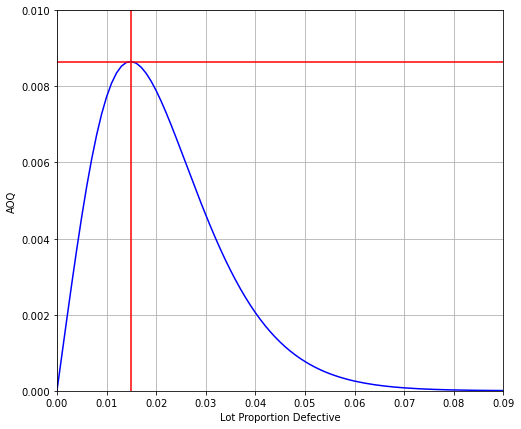

In [16]:
plt.figure(figsize=(8, 7))
X = np.arange(0, 1.0, 0.001)
plt.plot(X, df1['AOQ'], color='blue')
plt.xlabel('Lot Proportion Defective')
plt.ylabel('AOQ')
plt.axhline(max_aoq, color='red')
plt.axvline(p, color='red')
plt.axis([0, 0.09, 0, 0.01])
plt.grid()
plt.show()

##### ATI Curve

In [17]:
df1['ATI'] = [(n + (1 - df1.iloc[i, 1])*(N - n)) for i in df1.index]
df1.head()

,p,Prob_of_acceptance,AOQ,ATI
0,0.000,1.00000,0.000000,150.0000
1,0.001,0.99988,0.000950,150.3420
2,0.002,0.99781,0.001896,156.2415
3,0.003,0.99176,0.002827,173.4840
4,0.004,0.98068,0.003727,205.0620


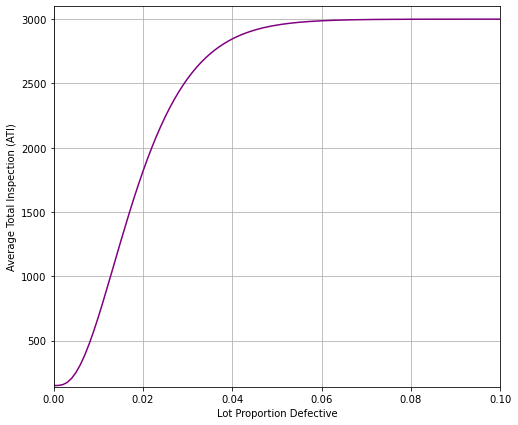

In [18]:
plt.figure(figsize=(8, 7))
X = np.arange(0, 1.0, 0.001)
plt.plot(X, df1['ATI'], color='purple')
plt.xlabel('Lot Proportion Defective')
plt.ylabel('Average Total Inspection (ATI)')
plt.axis([0, 0.1, 140, 3100])
plt.grid()
plt.show()

#### Lab 11

Draw the primary and supplementary OC curves for a double-sampling plan with 𝑛1 = 50,𝑐1 = 2,𝑛2 = 100,𝑐2 = 6. If the incoming lots have fraction non- conforming p = 0.05, what is the probability of acceptance on the first sample? What is the probability of final acceptance? Calculate the probability of rejection on the first sample.

In [20]:
𝑛1 = 50
𝑐1 = 2
𝑛2 = 100
𝑐2 = 6

# Create dataframe to store values
df2 = pd.DataFrame()
df2["p"] = np.arange(0, 1, 0.001)
df2['Prob_of_acceptance_I'] = infinite_size(𝑐1, 𝑛1, df2['p'])

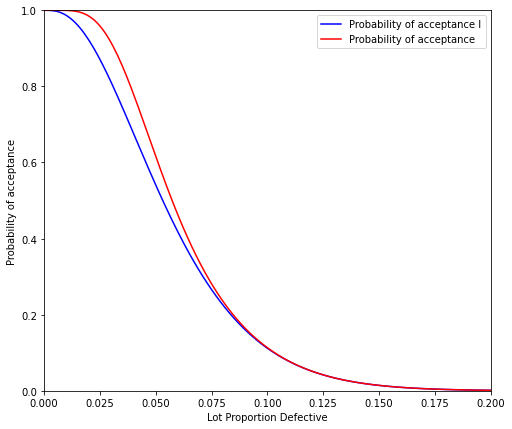

In [22]:
# Calculate the probability of acceptance II
# d1 + d2 <= 2 and c1 < d1 <= c2 means that d1 can have {3, 4, 5, 6}
'''  -----------------All the possibilities--------------------
- d1 = 3 and d2 <=3
- d1 = 4 and d2 <=2
- d1 = 5 and d2 <= 1
- d1 = 6 and d2 = 0
''' 

# Case 1
df2['case1_a'] = specific_d(d=3, n=𝑛1, data=df2['p'])
df2['case1_b'] = infinite_size(c=3, n=𝑛2, data=df2['p'])
prod1 = df2['case1_a'] * df2['case1_b']

# Case 2
df2['case2_a'] = specific_d(d=4, n=𝑛1, data=df2['p'])
df2['case2_b'] = infinite_size(c=2, n=𝑛2, data=df2['p'])
prod2 = df2['case2_a'] * df2['case2_b']

# Case 3
df2['case3_a'] = specific_d(d=5, n=𝑛1, data=df2['p'])
df2['case3_b'] = infinite_size(c=1, n=𝑛2, data=df2['p'])
prod3 = df2['case3_a'] * df2['case3_b']

# Case 4
df2['case4_a'] = specific_d(d=6, n=𝑛1, data=df2['p'])
df2['case4_b'] = specific_d(d=0, n=𝑛2, data=df2['p'])
prod4 = df2['case4_a'] * df2['case4_b']

# Total Probability of Acceptance II 
df2['Prob_of_acceptance_II'] =  prod1 + prod2 + prod3 + prod4

# Total Probability of Acceptance
df2['Prob_of_acceptance'] = df2['Prob_of_acceptance_I'] + df2['Prob_of_acceptance_II']

# Plots
plt.figure(figsize=(8, 7))
X = np.arange(0, 1.0, 0.001)
plt.plot(X, df2['Prob_of_acceptance_I'], color='blue')
plt.plot(X, df2['Prob_of_acceptance'], color='red')
plt.xlabel('Lot Proportion Defective')
plt.ylabel('Probability of acceptance')
plt.axis([0, 0.20, 0, 1])
plt.legend(['Probability of acceptance I', 'Probability of acceptance']) 
plt.show()

##### b- For p = 0.05, What is the probability of acceptance I and the total probability of acceptance.

#### Lab 12

Derive an item-by-item sequential-sampling plan for which 𝑝1 = 0.02,𝛼 = 0.05,𝑝2 = 0.15, and 𝛽=0.10. Draw the OC curve for this plan.

The acceptance line is : -1.04 + 0.07*n
The rejection line is : 1.34 + 0.07*n
Probabality of acceptance is : 0.5621471973289098


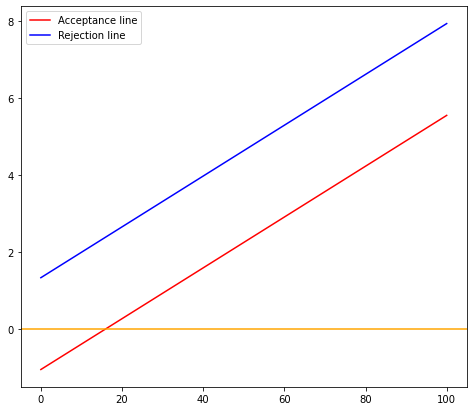

In [23]:
𝑝1 = 0.02
𝛼 =.05    
𝑝2 = 0.15
𝛽=0.10

k = np.log2((𝑝2*(1-𝑝1))/(𝑝1*(1-𝑝2)))
h1 = (np.log2((1-𝛼)/𝛽))/k
h2 = (np.log2((1-𝛽)/𝛼))/k
s = np.log2((1-𝑝1)/(1-𝑝2)) / k

print(f'The acceptance line is : {np.round(-h1, 2)} + {np.round(s,2)}*n')
print(f'The rejection line is : {np.round(h2, 2)} + {np.round(s,2)}*n')
print('Probabality of acceptance is :', (h2/(h1+h2)))
plt.figure(figsize=(8, 7))
n = np.linspace(0, 100, 2)
plt.plot(n, -h1 + s*n, 'red')
plt.plot(n, h2 + s*n, 'blue')
plt.legend(['Acceptance line', 'Rejection line'])
plt.axhline(y=0 , color='orange')
plt.show()